

*   Decreased layer count
-dense last layer
-used 4 classes
-used different architecture



In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import glob
import shutil

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, SeparableConv2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import callbacks


from tensorflow.keras.preprocessing import image


In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls   #check if mounted correctly

DATADIR = "/content/gdrive/My Drive/pc_stress_4_classes_multi_orientation_separated_2"
os.listdir('/content/gdrive/My Drive/pc_stress_4_classes_multi_orientation_separated_2')     #show directories in base directory

Mounted at /content/gdrive
gdrive	sample_data


['train', 'val', 'test']

In [ ]:
!ls 

gdrive	sample_data


In [ ]:
Classes = ["idle", "gpu_stress", "cpu_stress", "cpu_gpu_stress"]

In [ ]:
import random
for cl in Classes:
  img_path = os.path.join(DATADIR, cl)    # Merge DATADIR with class name
  print(img_path)
  images = glob.glob(img_path + '/*.jpg')   # Take path name and include everything with .jpg. Return list of all images
  random.shuffle(images)                    # randomly shuffle list
  print("{}: {} Images". format(cl,len(images)))
  num_train = int(round(len(images)*0.7))     # Find what 70% of images is
  num_val	= int(round(len(images)*0.9))
  train, val, test = images[:num_train], images[num_train:num_val], images[num_val:]   # Assign 70%, 20% and 10% of images to training, validation and test datasets respectively. list starting at index 0 up to but not including num_train

  for t in train:
    if not os.path.exists(os.path.join(DATADIR, 'train', cl)):
      os.makedirs(os.path.join(DATADIR, 'train', cl))
    shutil.move(t, os.path.join(DATADIR, 'train', cl))      # Move images to train directory

  for v in val:
    if not os.path.exists(os.path.join(DATADIR, 'val', cl)):
      os.makedirs(os.path.join(DATADIR, 'val', cl))
    shutil.move(v, os.path.join(DATADIR, 'val', cl))        #Move images to val directory

  for te in test:
    if not os.path.exists(os.path.join(DATADIR, 'test', cl)):
      os.makedirs(os.path.join(DATADIR, 'test', cl))
    shutil.move(te, os.path.join(DATADIR, 'test', cl))      # Move images to train directory


/content/gdrive/My Drive/pc_stress_4_classes_multi_orientation_separated_2/idle
idle: 1019 Images
/content/gdrive/My Drive/pc_stress_4_classes_multi_orientation_separated_2/gpu_stress
gpu_stress: 933 Images
/content/gdrive/My Drive/pc_stress_4_classes_multi_orientation_separated_2/cpu_stress
cpu_stress: 909 Images
/content/gdrive/My Drive/pc_stress_4_classes_multi_orientation_separated_2/cpu_gpu_stress
cpu_gpu_stress: 893 Images


In [ ]:
train_dir = os.path.join(DATADIR, 'train')      # Setup path for set
print(train_dir)
val_dir = os.path.join(DATADIR, 'val')          # Setup path for set
print(val_dir)
test_dir = os.path.join(DATADIR, 'test')          # Setup path for set
print(test_dir)

/content/gdrive/My Drive/pc_stress_4_classes_multi_orientation_separated_2/train
/content/gdrive/My Drive/pc_stress_4_classes_multi_orientation_separated_2/val
/content/gdrive/My Drive/pc_stress_4_classes_multi_orientation_separated_2/test


In [ ]:
batch_size = 64     
IMG_width = 150
IMG_height= 150

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.4
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_height,IMG_width),
                                                class_mode='sparse'
                                                )

Found 2627 images belonging to 4 classes.


In [ ]:
#This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()




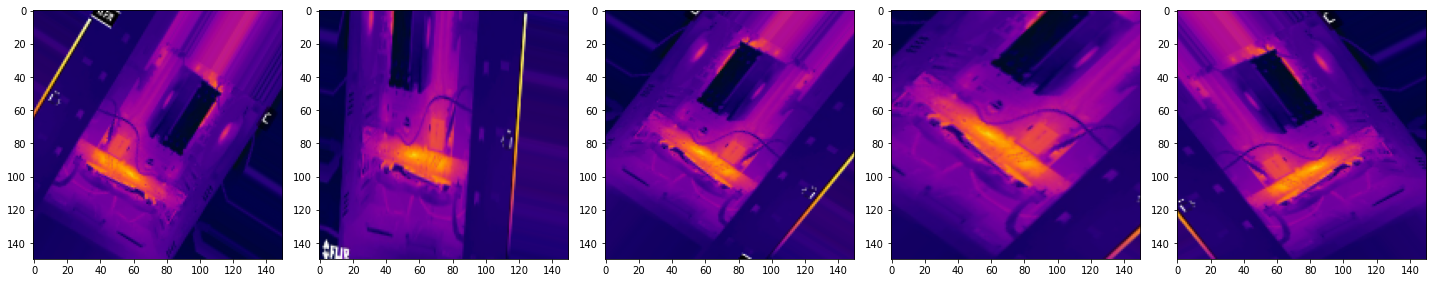

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_height,IMG_width),
                                                 class_mode='sparse')

Found 752 images belonging to 4 classes.


In [ ]:
image_gen_test = ImageDataGenerator(rescale=1./255)

test_data_gen = image_gen_test.flow_from_directory(batch_size=batch_size,
                                                 directory=test_dir,
                                                 target_size=(IMG_height,IMG_width),
                                                 class_mode='sparse')

Found 375 images belonging to 4 classes.


In [ ]:
model = Sequential()


model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_height,IMG_width, 3)))
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 150, 150, 16)      2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 37, 37, 64)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) # Early stopping (stops training when validation doesn't improve for {patience} epochs)
model_filepath = 'models/model4.keras'
save_best = callbacks.ModelCheckpoint(model_filepath, monitor='val_loss', save_best_only=True, mode='min', verbose=1) # Saves the best version of the model to disk (as measured on the validation data set)

epochs = 300

history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size))),
    shuffle = True,
    callbacks=[es, save_best])


Epoch 1/300
42/42 [==============================] - 821s 19s/step - loss: 1.3682 - accuracy: 0.3015 - val_loss: 1.1767 - val_accuracy: 0.6489

Epoch 00001: val_loss improved from inf to 1.17669, saving model to models/model4.keras
Epoch 2/300
42/42 [==============================] - 30s 718ms/step - loss: 1.1657 - accuracy: 0.4294 - val_loss: 0.7640 - val_accuracy: 0.8178

Epoch 00002: val_loss improved from 1.17669 to 0.76395, saving model to models/model4.keras
Epoch 3/300
42/42 [==============================] - 30s 713ms/step - loss: 0.9632 - accuracy: 0.5737 - val_loss: 0.4685 - val_accuracy: 0.8564

Epoch 00003: val_loss improved from 0.76395 to 0.46848, saving model to models/model4.keras
Epoch 4/300
42/42 [==============================] - 30s 717ms/step - loss: 0.7903 - accuracy: 0.6447 - val_loss: 0.3133 - val_accuracy: 0.8803

Epoch 00004: val_loss improved from 0.46848 to 0.31334, saving model to models/model4.keras
Epoch 5/300
42/42 [==============================] - 30s 

In [ ]:
import keras
# Training continues after improvement stops for the number of epochs equivalent to the 'patience' hyper-parameter
# To get back the model that performed best on the validation set we load the checkpointed model from disk:
model = keras.models.load_model(model_filepath)

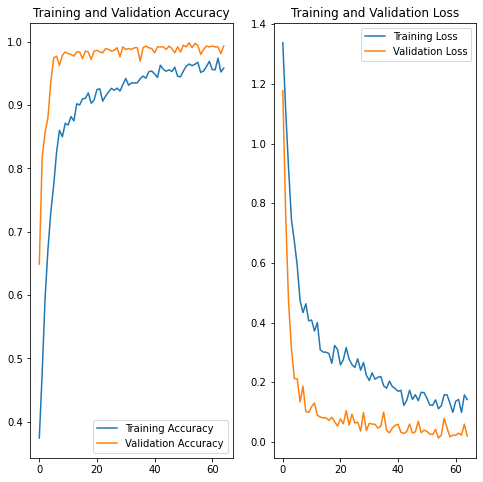

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(65)     #change this number to match the number of epochs trained for

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import math
test_loss, test_accuracy = model.evaluate(test_data_gen)
print('Accuracy on test dataset:', test_accuracy)

6/6 [==============================] - 80s 16s/step - loss: 0.0121 - accuracy: 0.9973
Accuracy on test dataset: 0.9973333477973938


In [ ]:
test_loss, test_accuracy = model.evaluate(train_data_gen)
print('Accuracy on train dataset:', test_accuracy)

42/42 [==============================] - 25s 589ms/step - loss: 0.0763 - accuracy: 0.9722
Accuracy on train dataset: 0.9722116589546204


In [ ]:
test_loss, test_accuracy = model.evaluate(val_data_gen)
print('Accuracy on validation dataset:', test_accuracy)

12/12 [==============================] - 4s 340ms/step - loss: 0.0129 - accuracy: 0.9973
Accuracy on validation dataset: 0.9973404407501221


In [ ]:
# sunflower_url = "/content/gdrive/My Drive/pc_stress_4_classes_multi_orientation_separated_2/test/idle/4FLIR1 (858).jpg"        
# sunflower_url = "/content/gdrive/My Drive/pc_stress_4_classes_multi_orientation_separated_2/test/cpu_stress/4FLIR3 (283).jpg"
# sunflower_url = "/content/gdrive/My Drive/pc_stress_4_classes_multi_orientation_separated_2/test/gpu_stress/6FLIR2 (586).jpg"
sunflower_url = "/content/gdrive/My Drive/pc_stress_4_classes_multi_orientation_separated_2/test/cpu_gpu_stress/25FLIR4 (227).jpg"



# sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
print(Classes)
img = keras.preprocessing.image.load_img(
    sunflower_url, target_size=(IMG_height,IMG_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array /= 255
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
#############
result = model.predict_classes(img_array)         
print(result[0])
##############
Classes.sort()                          #to match predictions to classes list, you must sort by alphabetical order
print(Classes)
score = tf.nn.softmax(predictions[0])
print(predictions)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(Classes[np.argmax(predictions)], 100 * np.max(predictions[0]))
)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(img_array)
predictions[0]


['cpu_gpu_stress', 'cpu_stress', 'gpu_stress', 'idle']
0
['cpu_gpu_stress', 'cpu_stress', 'gpu_stress', 'idle']
[[9.9999988e-01 2.0028672e-08 8.3173596e-08 1.4361618e-12]]
This image most likely belongs to cpu_gpu_stress with a 100.00 percent confidence.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0.4753668, 0.1748777, 0.1748777, 0.1748777], dtype=float32)

In [ ]:
import time

In [ ]:
t = time.time()

export_path_sm = "./{}".format(int(t))
print(export_path_sm)

tf.saved_model.save(model, export_path_sm)

./1613179743
INFO:tensorflow:Assets written to: ./1613179743/assets


In [ ]:
!ls {export_path_sm}

assets	saved_model.pb	variables


In [ ]:
#zip a folder under /content/Folder_To_Zip
!zip -r /content/file.zip  /content/1613179743

  adding: content/1613179743/ (stored 0%)
  adding: content/1613179743/assets/ (stored 0%)
  adding: content/1613179743/variables/ (stored 0%)
  adding: content/1613179743/variables/variables.index (deflated 75%)
  adding: content/1613179743/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/1613179743/saved_model.pb (deflated 90%)
